### Data

In [1]:
# Read the dataset
import pandas as pd
df = pd.read_csv('kc_house_data.csv')
df.head(4)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000


In [2]:
# drop useless columns
df.drop(['id', 'date'], axis=1, inplace=True)

### Exploratory Data Analysis

In [3]:
df['bathrooms'] = df['bathrooms'].apply(round)
df['floors'] = df['floors'].apply(round)

In [4]:
cat_features = [col for col in df.columns if df[col].nunique() < 15]
cat_features

['bedrooms', 'bathrooms', 'floors', 'waterfront', 'view', 'condition', 'grade']

[]

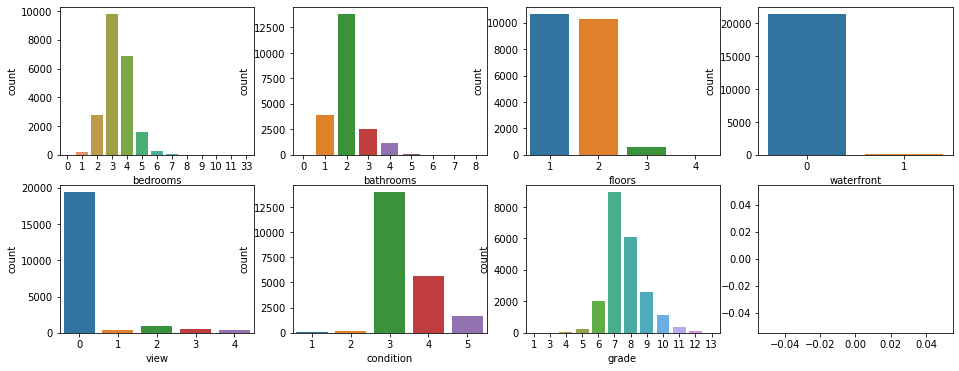

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize']=(16,6)

fig,axes = plt.subplots(2,4)

k = 0
for i in range(len(axes)):
    for j in range(len(axes[0])):
        sns.countplot(ax = axes[i][j], x=cat_features[k], data=df)
        k += 1
        if k > 6: break
    
plt.plot()

In [6]:
num_features = [col for col in df.columns if df[col].nunique() > 15]
num_features = list(set(num_features) - set(['price', 'zipcode', 'yr_renovated']))

[]

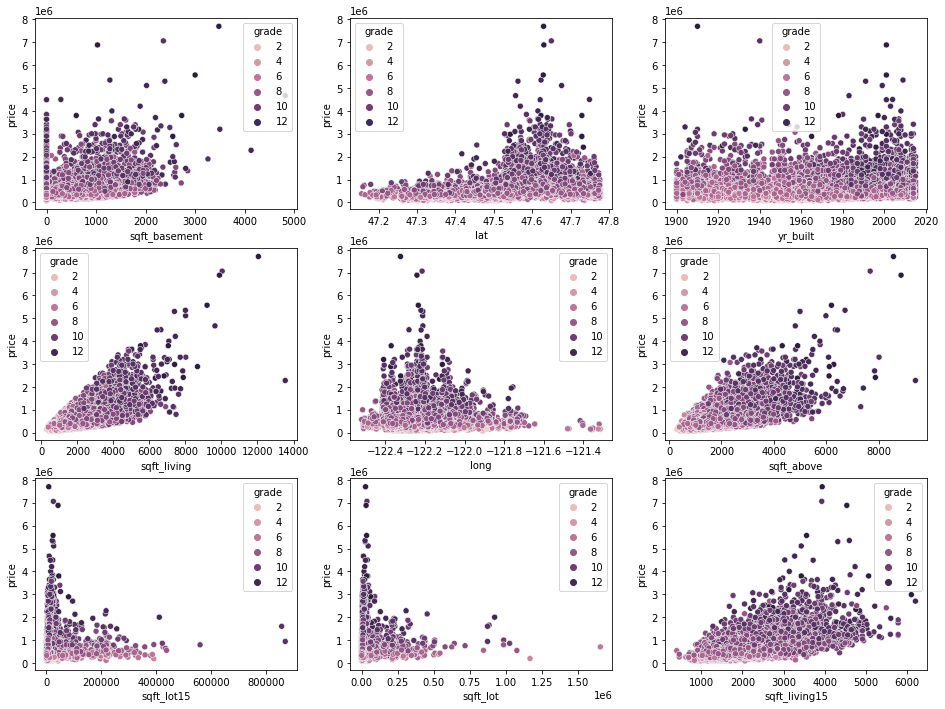

In [7]:
plt.rcParams['figure.figsize']=(16, 12)

fig,axes = plt.subplots(3,3)

hue = 'grade'
k = 0
for i in range(len(axes)):
    for j in range(len(axes[0])):
        sns.scatterplot(ax = axes[i][j], x=num_features[k], y='price', data=df, hue=hue)
        k += 1
    
plt.plot()

[]

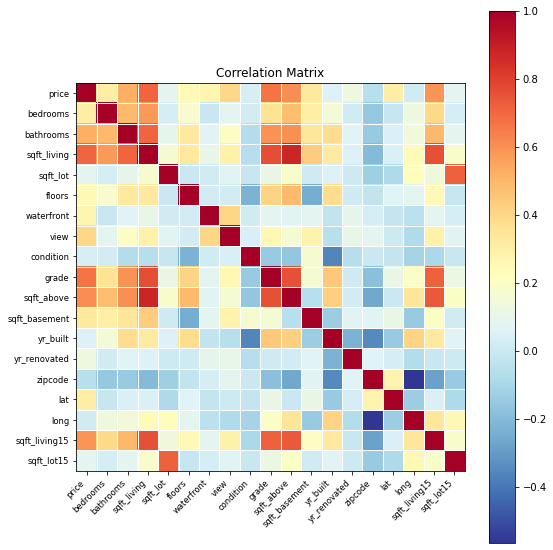

In [8]:
# correlation matrix
import statsmodels.api as sm
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (8,8)
corr = df.corr()
sm.graphics.plot_corr(corr, xnames=corr.columns)
plt.plot(figsize=(8,8))

In [9]:
df['lat_long'] = df['lat'] * df['long']

### Get predictor and target variables

In [10]:
X = df.drop('price', axis=1)
y = df['price']

### Split Data into Training and Test Sets

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
print('Training Data:', X_train.shape)
print('Test Data:', X_test.shape)

Training Data: (16209, 19)
Test Data: (5404, 19)


### Model Training and Evaluation

In [12]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

linear = LinearRegression()
tree = DecisionTreeRegressor()
forest = RandomForestRegressor()
boost = GradientBoostingRegressor()

In [13]:
from sklearn.metrics import r2_score, mean_absolute_error
models = [linear, tree, forest, boost]

for model in models:
    # train model
    model.fit(X_train, y_train)
    # make predictions
    y_pred = model.predict(X_test)
    # get evaluation results
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    # display results
    print(model)
    print('================================')
    print('R-Squared: %.2f%%'%(r2*100))
    print('Mean Absolute Error: %.3f'%(mae))
    print()

LinearRegression()
R-Squared: 69.69%
Mean Absolute Error: 122830.048

DecisionTreeRegressor()
R-Squared: 78.17%
Mean Absolute Error: 96554.721

RandomForestRegressor()
R-Squared: 89.47%
Mean Absolute Error: 65903.087

GradientBoostingRegressor()
R-Squared: 87.50%
Mean Absolute Error: 75187.460



In [14]:
print('Mean Price:', y_test.mean())

Mean Price: 535098.7958919319
